<center>
<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/AB.jpeg?raw=true" height="200"> 

# Андан на экономе: домашнее задание 4 
## Проверка гипотез и А/Б-тестирование
</center>


**ФИО:** Мамонтова Дарья Андреевна

**id из контеста:**  -

## Импорт необходимых библиотек 


In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [4]:
df = pd.read_csv("C:\\Users\\user\\OneDrive\\Рабочий стол\\students_exam.csv")

__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
high = df[(df['parental level of education']=="associate's degree")|(df['parental level of education']=="bachelor's degree")|(df['parental level of education']=="master's degree")]
high = np.array(high['math score'])
middle = df[(df['parental level of education']=="high school")|(df['parental level of education']=="some high school")|(df['parental level of education']=="some college")]
middle = np.array(middle['math score'])

In [7]:
c = len(high)+len(middle)-2

In [8]:
h_m =  high.mean()
m_m = middle.mean()
z_obs = (h_m-m_m)/(np.sqrt((high.std())**2/len(high)+(middle.std())**2/len(middle)))

In [9]:
z_crit = sts.norm.ppf(0.05)

In [10]:
if z_obs >= z_crit:
    print('H0 отвергается')
else:
    print('Н0 не отвергается')

H0 отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Для проверки гипотезы я выбрала z-критерий. Конечно, в условии неизвестных дисперсий, корректнее было бы использовать t-критерий, но поскольку количество значений в выборке достаточно высокое, то критерий хорошо аппроксимируется стандартным нормальным распределением(согласно ЦПТ). Предпосылки таковы, что величины распределены нормально, и это выполняется для данных опять же согласно ЦПТ, а также выборки независимы.

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [11]:
reading = df['reading score']
math = df['math score']

In [12]:
a = len(reading)+len(math)-2

In [13]:
r_m = reading.mean()
ma_m = math.mean()
z_obs = (r_m-ma_m)/(np.sqrt((reading.std())**2/len(reading)+(math.std())**2/len(math)))

In [14]:
z_crit = sts.norm.ppf(0.05)

In [15]:
if np.abs(z_obs) >= z_crit:
    print('H0 отвергается')
else:
    print('Н0 не отвергается')

H0 отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Аналогично, для проверки гипотезы я выбрала z-критерий. Конечно, в условии неизвестных дисперсий, корректнее было бы использовать t-критерий, но поскольку количество значений в выборке достаточно высокое, то критерий хорошо аппроксимируется стандартным нормальным распределением(согласно ЦПТ). Предпосылки таковы, что величины распределены нормально, и это выполняется для данных опять же согласно ЦПТ, а также выборки независимы.

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [16]:
df = pd.read_csv("C:\\Users\\user\\OneDrive\\Рабочий стол\\аНдАн\\mouse.csv", sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

In [17]:
df.head()

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884
6,1,23,1,1.0,10.143030
7,1,20,1,1.0,7.447534


__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

In [18]:
paper =df[df['STUDY']==1] #фрейм с решением на бумаге
reality = df[df['STUDY']==2] #фрейм с решением ирл

In [19]:
p_p = paper['DECISION'].mean() #вероятность того, что человек, решающий задачу на бумаге нажмет на кнопку
p_r = reality['DECISION'].mean()#вероятность того, что человек, решающий задачу ирл нажмет на кнопку

In [20]:
disp_1 = (p_p)*(1-p_p)/len(paper)
disp_2 = (p_r)*(1-p_r)/len(reality)

In [21]:
z_obs = (p_p-p_r)/np.sqrt(disp_1+disp_2)

In [22]:
z_crit = sts.norm.ppf(0.05)

In [23]:
if z_obs >= z_crit:
    print('H0 отвергается')
else:
    print('H0 не отвергается')

H0 отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Для проверки равенства вероятностей я выбрала z-критерий, из тех же соображений, что и в предыдущих пунктах о нормальности величин и большом количестве наблюдений (о ЦПТ).

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

In [24]:
mu = df['RT']
m = mu.mean() #среднее значение времени принятия решения

In [25]:
z_obs = (m-5)/np.sqrt((mu.std())**2/len(mu))

In [26]:
z_crit = sts.norm.ppf(0.05)

In [27]:
if z_obs >= z_crit:
    print('H0 отвергается')
else:
    print('H0 не отвергается')

H0 отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Опять же z-критерий, с такими же предпосылками как и во всех прошлых пунктах.

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [28]:
men_ok = 770/(770+880) #доля выздоровевших мужчин, принимавших лекарство
men_neok = 88/(88+135)#доля выздоровевших мужчин, не принимавших лекарство
men_ok>men_neok

True

__Вывод__: доля выздоровевших мужчин, принимавших лекарство, больше доли выздоровевших мужчин, не принимавших лекарство

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [29]:
men = np.array([[770,880],[88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [30]:
hi_crit = sts.chi2.ppf(0.95, df = 1)

In [31]:
hi_obs = sts.chi2_contingency(men,correction=False)[0]
hi_obs

4.107854906463222

In [32]:
if hi_obs>hi_crit:
    print('H0 отвергается')
else:
    print('H0 не отвергается')

H0 отвергается


__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [33]:
sts.chi2_contingency(men,correction=False)[3]

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

In [34]:
n = men.sum() #общее количество испытуемых мужчин
n

1873

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [35]:
n1 = men.sum(axis=1)[0] #количество мужчин, принимавших лекарство
n2 = men.sum(axis=1)[1] #количество мужчин, не принимавших лекарство
n1,n2

(1650, 223)

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [36]:
n_b = men.sum(axis=0)[0]
n_neb = men.sum(axis=0)[1]
p_vizd = n_b/n
p_nevizd = n_neb/n
p_vizd,p_nevizd

(0.4580886278697277, 0.5419113721302723)

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [37]:
matrix = np.array([[p_vizd*n1,p_nevizd*n1],
                  [p_vizd*n2,p_nevizd*n2]])
matrix

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [38]:
hi_obs2 = ((men-matrix)**2/matrix).sum()
p_value = 1 - sts.chi2.cdf(hi_obs2, df = 1)
hi_obs2,p_value

(4.107854906463222, 0.04268446899604583)

__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [39]:
women_ok = 165/(165+80) #доля выздоровевших женщин, принимавших лекарство
women_neok = 440/(440+310)#доля выздоровевших женщин, не принимавших лекарство
women_ok>women_neok

True

__Вывод__: доля выздоровевших женщин, принимавших лекарство, больше доли выздоровевших женщин, не принимавших лекарство

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [40]:
women = np.array([[165,80],[440,310]])

In [41]:
hiw_crit = sts.chi2.ppf(0.95, df = 1)

In [42]:
hiw_obs = sts.chi2_contingency(women,correction=False)[0]
hiw_obs

5.838444095586957

In [43]:
if hi_obs>hi_crit:
    print('H0 отвергается')
else:
    print('H0 не отвергается')

H0 отвергается


__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [44]:
full_ok = 935/(935+960)
full_neok = 528/(528+445)
full_ok>full_neok 

False

__Вывод__: получаем, что доля выздоровевших женщин и мужчин, принимавших лекарство, меньше доли выздоровевших женщин и мужчин, не принимавших лекарство

In [45]:
total = np.array([[935,960],[528,445]])

In [46]:
hit_crit = sts.chi2.ppf(0.95, df = 1)
hit_obs = sts.chi2_contingency(total,correction=False)[0]

In [47]:
if hi_obs>hi_crit:
    print('H0 отвергается')
else:
    print('H0 не отвергается')

H0 отвергается


Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

__Вывод__: Как мы можем заметить, основная гипотеза отвергается для всех групп. Тем не менее, мы видим, что парадокс работает, так как при рассмотрении в отдельности группу мужчин и группу женщин мы наблюдаем одинаково направленную зависимость: доля выздоровевших женщин/мужчин, принимавших лекарство, больше доли выздоровевших женщин/мужчин, не принимавших лекарство. Однако, когда мы объединяем две эти группы, получаем обратный результат: доля выздоровевших людей, не принимавших лекарство, больше доли выздоровевших людей, принимавших лекарство.

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [48]:
z_1 = sts.norm.ppf(0.975)
z_2 = sts.norm.ppf(0.8)

In [49]:
a_m = 100
a_std = 20
mde = 5
alpha = 0.05
beta = 0.2
b_std = 20
n_total = 200
n_one_group = np.round(((a_std**2+b_std**2)*(z_1+z_2)**2)/(mde**2))

In [50]:
from math import ceil

In [51]:
days = ceil(n_one_group/(200*0.5))
days

3

__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [52]:
np.random.seed(1)
group_aa = np.random.normal(100,20,100)
group_bb = np.random.normal(105,20,100)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [53]:
p_values = []
avg_a = np.array([])
avg_b = np.array([])
mean_a = np.zeros(50)
mean_b = np.zeros(50)
for i in range(50):
    group_a = sts.norm.rvs(100,20,100)
    group_b = sts.norm.rvs(105,20,100)
    avg_a = np.append(avg_a,group_a)
    avg_b = np.append(avg_b,group_b)
    mean_a[i] = np.mean(avg_a)
    mean_b[i] = np.mean(avg_b)
    p_value = sts.ttest_ind(avg_a,avg_b)[1]
    p_values.append(p_value)
    

In [54]:
metrics = pd.DataFrame({"day": range(1,51),"mean_a": mean_a,"mean_b":mean_b,"p_value":p_values}).reset_index(drop=True)
metrics.head()

,day,mean_a,mean_b,p_value
0,1,100.196438,104.592751,0.136743
1,2,100.741693,106.052274,0.011137
2,3,100.111023,105.052159,0.003358
3,4,100.617966,105.255770,0.001066
4,5,100.635966,104.724654,0.001259


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

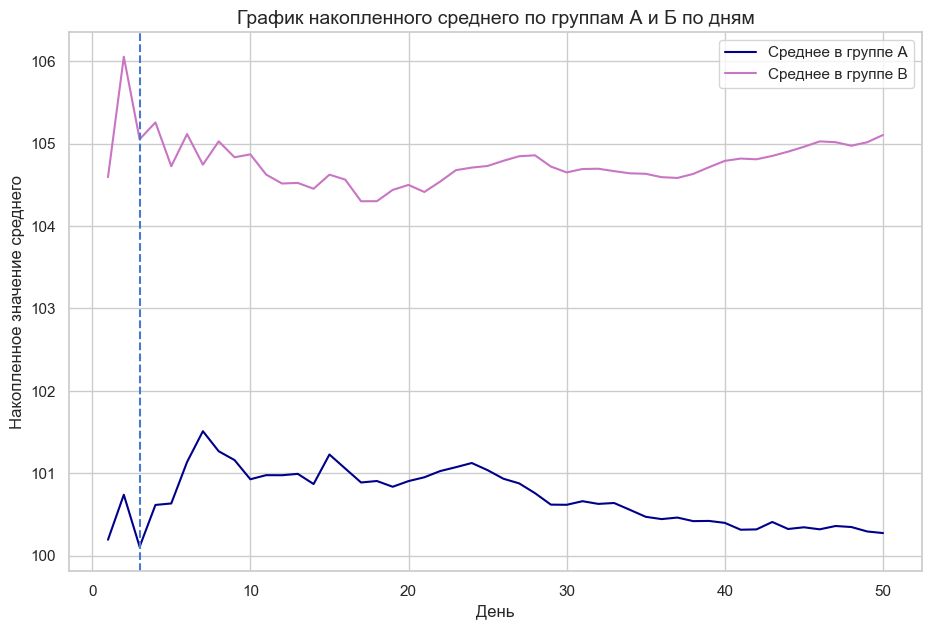

In [55]:
plt.figure(figsize=(11,7))
plt.grid(True)
plt.plot(metrics['day'],metrics['mean_a'],color = '#00008B',label = 'Среднее в группе А') 
plt.plot(metrics['day'],metrics['mean_b'],color= '#C875C4', label = 'Среднее в группе B')
plt.axvline(x=3,linestyle ='--')
plt.xlabel('День')
plt.ylabel('Накопленное значение среднего')
plt.title('График накопленного среднего по группам А и Б по дням',fontsize=14)
plt.legend(loc = 'best')

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

Text(0.5, 1.0, 'График накопленного p_value для групп А и Б по дням')

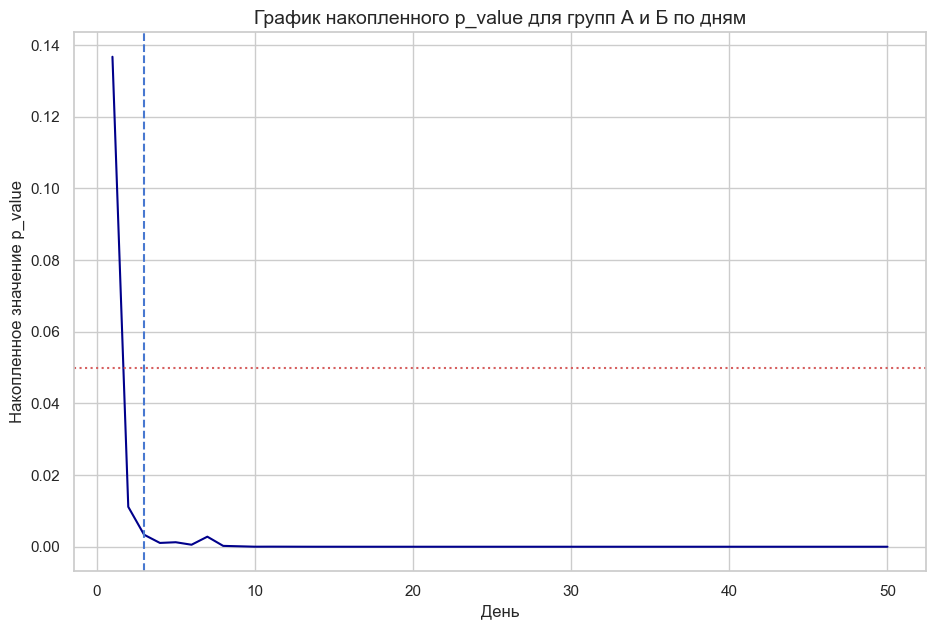

In [56]:
plt.figure(figsize=(11,7))
plt.grid(True)
plt.plot(metrics['day'],metrics['p_value'],color = '#00008B') 
plt.axvline(x=3,linestyle ='--')
plt.axhline(y = 0.05, color = 'r', linestyle = 'dotted')
plt.xlabel('День')
plt.ylabel('Накопленное значение p_value')
plt.title('График накопленного p_value для групп А и Б по дням',fontsize=14)

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

__Вывод__:
- накопленное среднее для обеих групп колеблется примерно около своих заданных математических ожиданий и не пересекается
- p-value <u>до количества дней</u>, посчитанных по формуле из п.1, меняется: при одних генерациях "хвост" значительно выше и почти доходит до уровня значимости, при других - становится ближе к нулю.
- p-value <u>в точке количества дней</u>, посчитанных по формуле из п.1: почти  при всех генерациях равен очень близок к нулю или равен ему
- p-value <u>после количества дней</u>, посчитанных по формуле из п.1: при всех генерациях начиная с какого-либо дня не меняется и всегда остается равным 0

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [57]:
p_values = []
avg_a = np.array([])
avg_b = np.array([])
mean_a = np.zeros(50)
mean_b = np.zeros(50)
for i in range(50):
    group_a = sts.norm.rvs(100,20,100)
    group_b = sts.norm.rvs(101,20,100)
    avg_a = np.append(avg_a,group_a)
    avg_b = np.append(avg_b,group_b)
    mean_a[i] = np.mean(avg_a)
    mean_b[i] = np.mean(avg_b)
    p_value = sts.ttest_ind(avg_a,avg_b)[1]
    p_values.append(p_value)

In [58]:
metrics = pd.DataFrame({"day": range(1,51),"mean_a": mean_a,"mean_b":mean_b,"p_value":p_values}).reset_index(drop=True)
metrics.head()

,day,mean_a,mean_b,p_value
0,1,98.782616,102.596690,0.168189
1,2,100.315692,100.830837,0.798317
2,3,100.120929,100.370651,0.880339
3,4,99.601091,101.520026,0.175720
4,5,100.007144,101.827195,0.157229


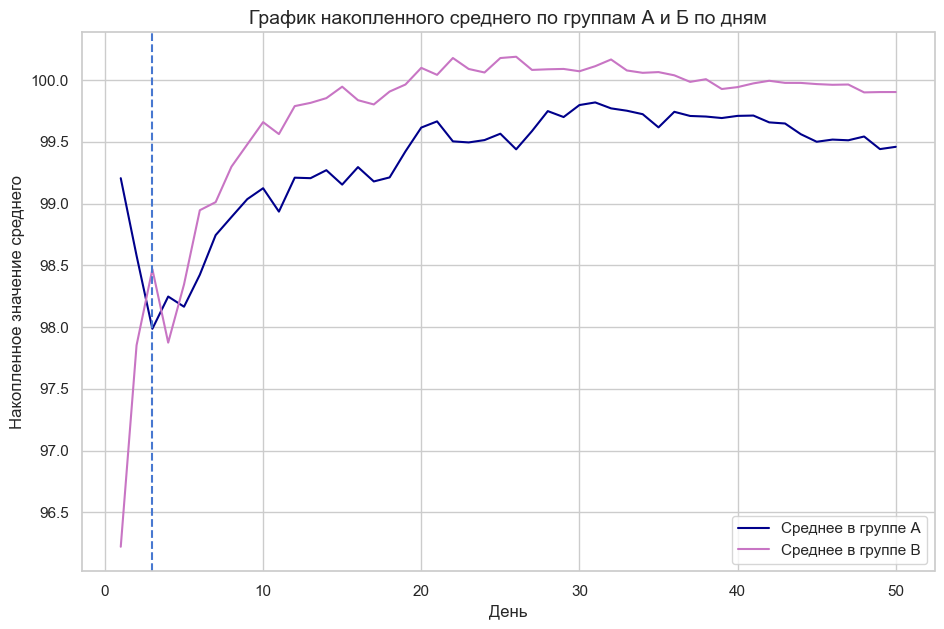

In [68]:
plt.figure(figsize=(11,7))
plt.grid(True)
plt.plot(metrics['day'],metrics['mean_a'],color = '#00008B',label = 'Среднее в группе А') 
plt.plot(metrics['day'],metrics['mean_b'],color= '#C875C4', label = 'Среднее в группе B')
plt.axvline(x=3,linestyle ='--')
plt.xlabel('День')
plt.ylabel('Накопленное значение среднего')
plt.title('График накопленного среднего по группам А и Б по дням',fontsize=14)
plt.legend(loc = 'best')

Text(0.5, 1.0, 'График накопленного p_value для групп А и Б по дням')

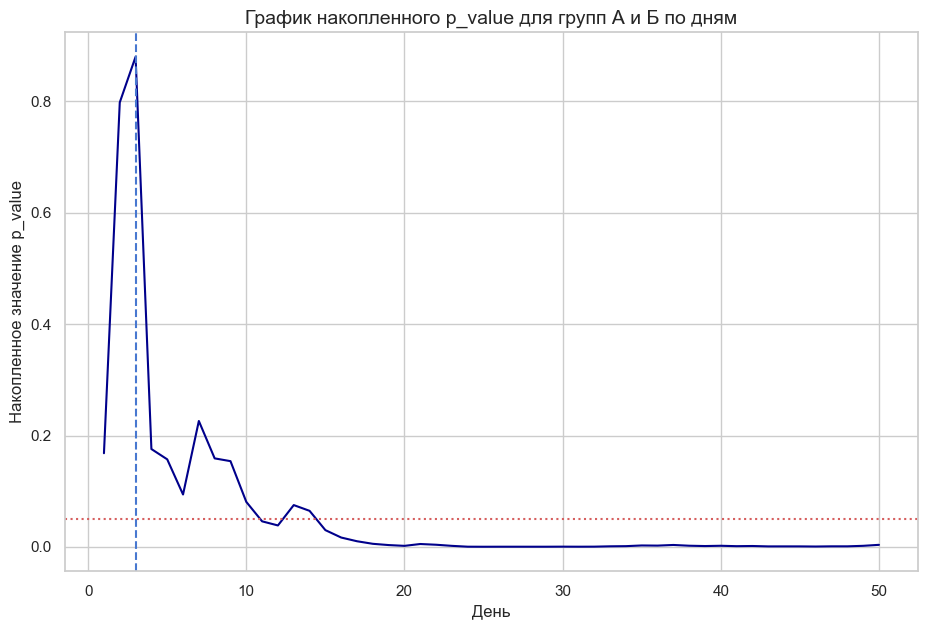

In [61]:
plt.figure(figsize=(11,7))
plt.grid(True)
plt.plot(metrics['day'],metrics['p_value'],color = '#00008B') 
plt.axvline(x=3,linestyle ='--')
plt.axhline(y = 0.05, color = 'r', linestyle = 'dotted')
plt.xlabel('День')
plt.ylabel('Накопленное значение p_value')
plt.title('График накопленного p_value для групп А и Б по дням',fontsize=14)

__Вывод__: Теперь, если мы посмотрим на график p-value,можем заметить, что в определенных промужетках он становится значительно выше установленного уровня значимости, а после точки определенного в пункте 1 количества дней не выходит чисто на 0 при разных генерациях. Также графики накопленных средних начинают пересекаться

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

In [70]:
p_values = []
avg_a = np.array([])
avg_b = np.array([])
mean_a = np.zeros(50)
mean_b = np.zeros(50)
for i in range(50):
    group_a = sts.norm.rvs(100,20,100)
    group_b = sts.norm.rvs(100,20,100)
    avg_a = np.append(avg_a,group_a)
    avg_b = np.append(avg_b,group_b)
    mean_a[i] = np.mean(avg_a)
    mean_b[i] = np.mean(avg_b)
    p_value = sts.ttest_ind(avg_a,avg_b)[1]
    p_values.append(p_value)

In [71]:
metrics = pd.DataFrame({"day": range(1,51),"mean_a": mean_a,"mean_b":mean_b,"p_value":p_values}).reset_index(drop=True)
metrics.head()

,day,mean_a,mean_b,p_value
0,1,101.183851,102.725462,0.606216
1,2,100.243772,100.527656,0.890802
2,3,100.042169,100.518468,0.773686
3,4,100.244703,100.658585,0.770275
4,5,100.118834,100.796190,0.594453


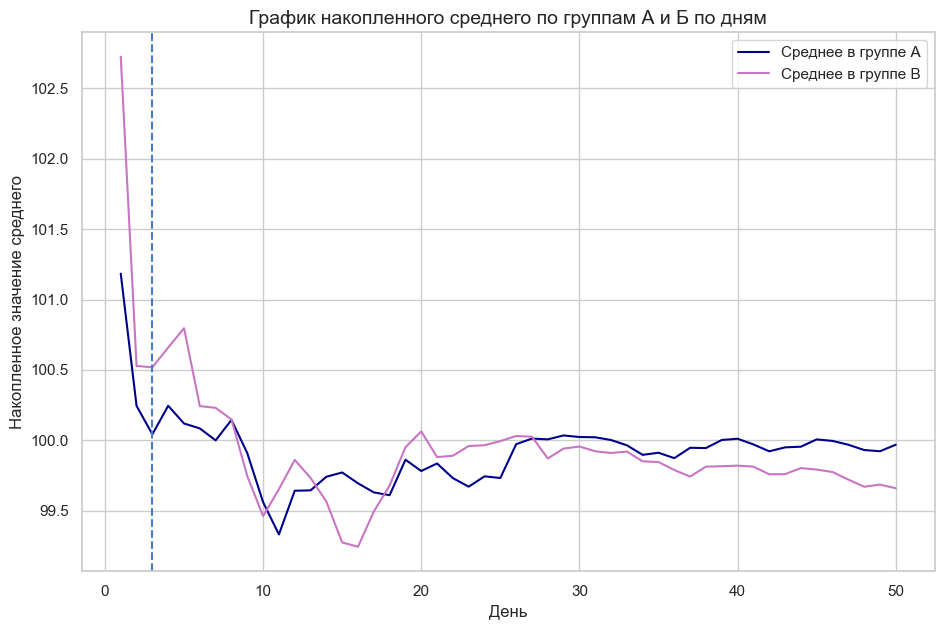

In [72]:
plt.figure(figsize=(11,7))
plt.grid(True)
plt.plot(metrics['day'],metrics['mean_a'],color = '#00008B',label = 'Среднее в группе А') 
plt.plot(metrics['day'],metrics['mean_b'],color= '#C875C4', label = 'Среднее в группе B')
plt.axvline(x=3,linestyle ='--')
plt.xlabel('День')
plt.ylabel('Накопленное значение среднего')
plt.title('График накопленного среднего по группам А и Б по дням',fontsize=14)
plt.legend(loc = 'best')

Text(0.5, 1.0, 'График накопленного p_value для групп А и Б по дням')

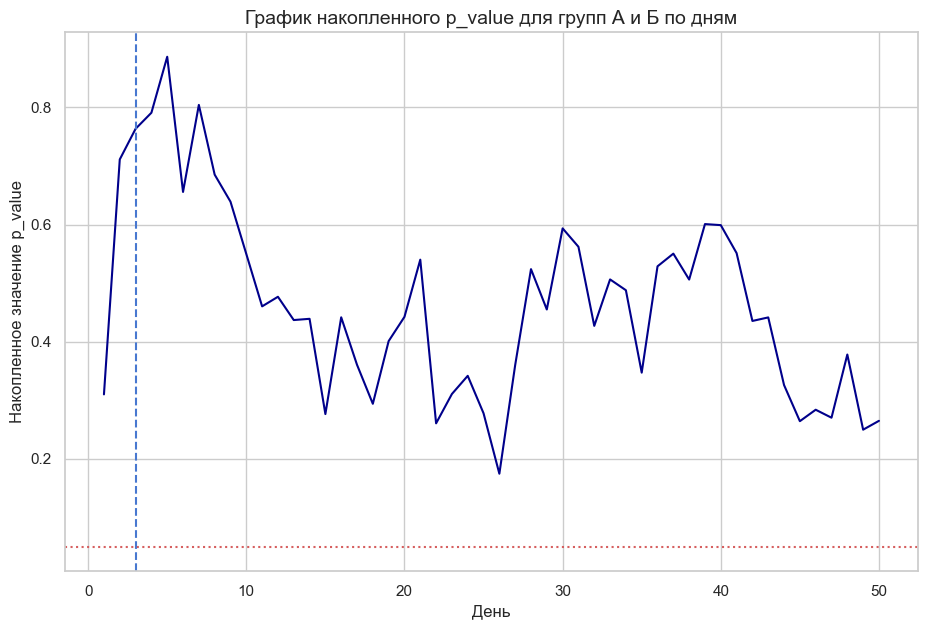

In [65]:
plt.figure(figsize=(11,7))
plt.grid(True)
plt.plot(metrics['day'],metrics['p_value'],color = '#00008B') 
plt.axvline(x=3,linestyle ='--')
plt.axhline(y = 0.05, color = 'r', linestyle = 'dotted')
plt.xlabel('День')
plt.ylabel('Накопленное значение p_value')
plt.title('График накопленного p_value для групп А и Б по дням',fontsize=14)

__Вывод__: Теперь мы получаем совершенно иную картину: p-value не опускается ниже установленного уровня значимости при разных генерациях, а также никогда не достигает 0(который был в самом начале). Графики накопленных средних становятся примерно похожими, но не совпадают

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [66]:
def generate_pvalue():
    p_values = []
    avg_a = np.array([])
    avg_b = np.array([])
    for i in range(50):
        group_a = sts.norm.rvs(100,20,100)
        group_b = sts.norm.rvs(100,20,100)
        avg_a = np.append(avg_a,group_a)
        avg_b = np.append(avg_b,group_b)
        p_value = sts.ttest_ind(avg_a,avg_b)[1]
        p_values.append(p_value)
    return p_values[-1]

p_val = [generate_pvalue() for l in range(1000)]  # Генерация 1000 значений p-value

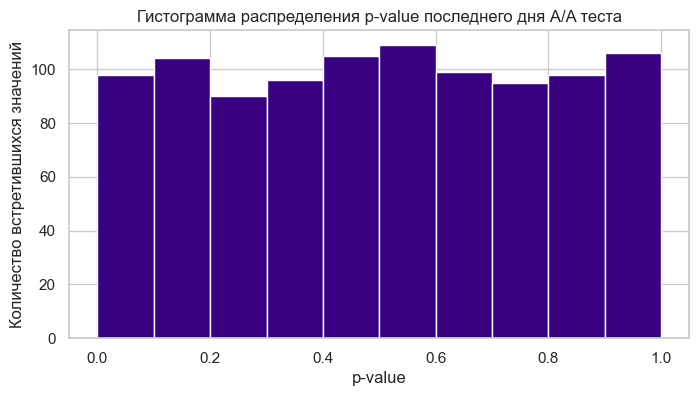

In [67]:
plt.hist(p_val,color='#380282')
plt.xlabel('p-value')
plt.ylabel('Количество встретившихся значений')
plt.title('Гистограмма распределения p-value последнего дня А/A теста')
plt.show()

__Вывод__: Из гистограммы мы видим что-то +- равномерное, что верно для p-value, если нулевая гипотеза верна и A/A тест не обнаруживает статистически значимых различий между группами. 